In [49]:
import os
os.chdir("/import/") 

In [50]:
import scanpy as sc
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as pt
import bbknn      
import scanpy.external as sce

In [77]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')
import os 
os.getcwd()  ##查看当前路径
os.chdir('./mdd.rna') ##修改路径
os.getcwd() 
results_file = 'combined.h5ad'

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                         9.2.0
annoy                       NA
anyio                       NA
argcomplete                 NA
array_api_compat            1.4
arrow                       1.2.3
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.12.1
backcall                    0.2.0
bbknn                       1.6.0
brotli                      1.0.9
certifi                     2024.02.02
cffi                        1.15.1
charset_normalizer          3.2.0
colorama                    0.4.6
comm                        0.1.4
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.8
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.1.3
executing                   1.2.0
fastjsonschema              NA
fqdn                        NA
get_annotati

In [52]:
adata_ref = sc.read_h5ad('./GSE213982_fel/res.h5ad')

In [53]:
adata = sc.read_h5ad('./GSE144136_mal/res.h5ad')

In [54]:
var_names = adata_ref.var_names.intersection(adata.var_names) #提取共有基因
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [ ]:
# sc.pp.pca(adata_ref)  ##对参考数据集进行降维
# sc.pp.neighbors(adata_ref)
# sc.tl.umap(adata_ref)
#pt.savefig('pbmc3k_ref_umap.pdf')

In [ ]:
#sc.tl.leiden(adata_ref)

/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


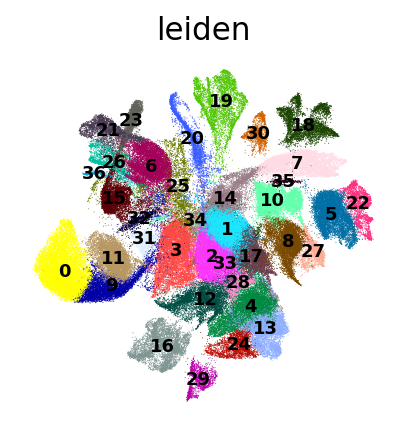

In [55]:
sc.pl.umap(adata_ref,color=['leiden'], legend_loc='on data',legend_fontsize='xx-small')

/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


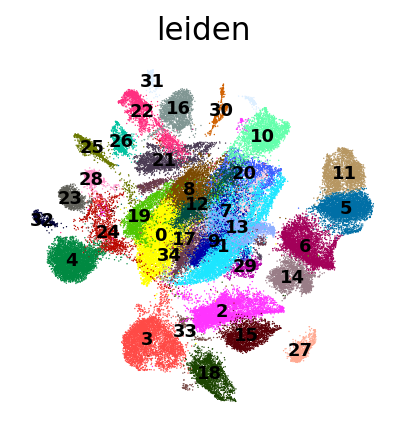

In [56]:
sc.pl.umap(adata,color=['leiden'], legend_loc='on data',legend_fontsize='xx-small')

In [57]:
adata_ref.obs['batch'] = 'female'

In [58]:
adata.obs['batch'] = 'male'

In [59]:
cdata=sc.concat([adata,adata_ref],merge='same')

In [60]:
cdata.obs['batch'].unique()

array(['male', 'female'], dtype=object)

In [61]:
# sc.tl.pca(cdata)
# sc.external.pp.bbknn(cdata, batch_key='batch')  
# sc.pl.umap(cdata, color=['batch', 'celltype'],legend_fontsize='xx-small')

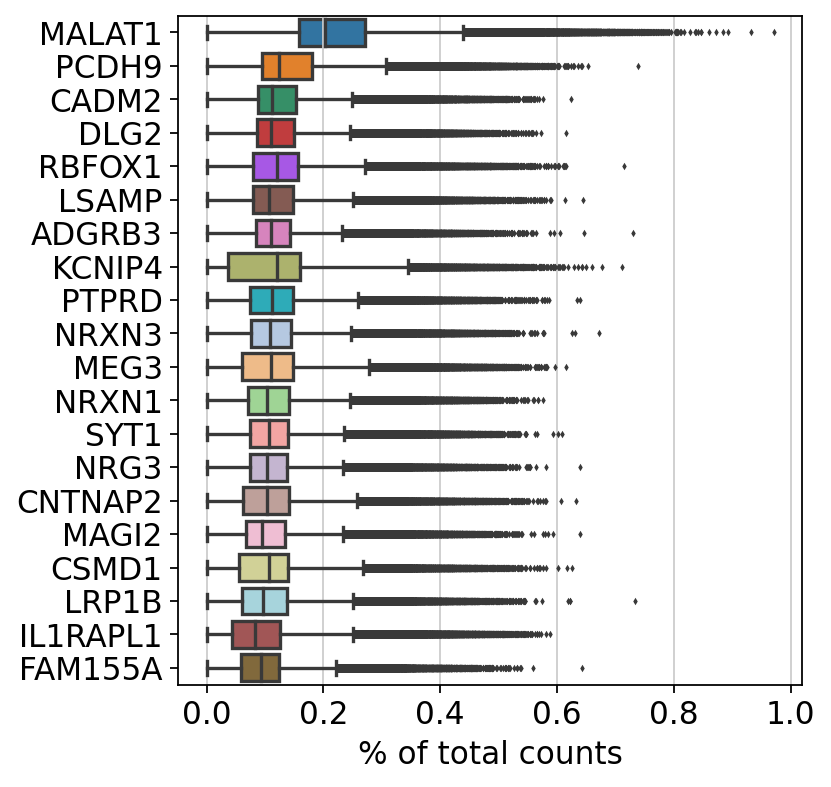

In [62]:
sc.pl.highest_expr_genes(cdata, n_top=20, )

In [63]:
sc.pp.normalize_total(cdata, target_sum=1e4)
sc.pp.log1p(cdata)

In [64]:
cdata.raw = cdata

In [65]:
cdata_raw = cdata

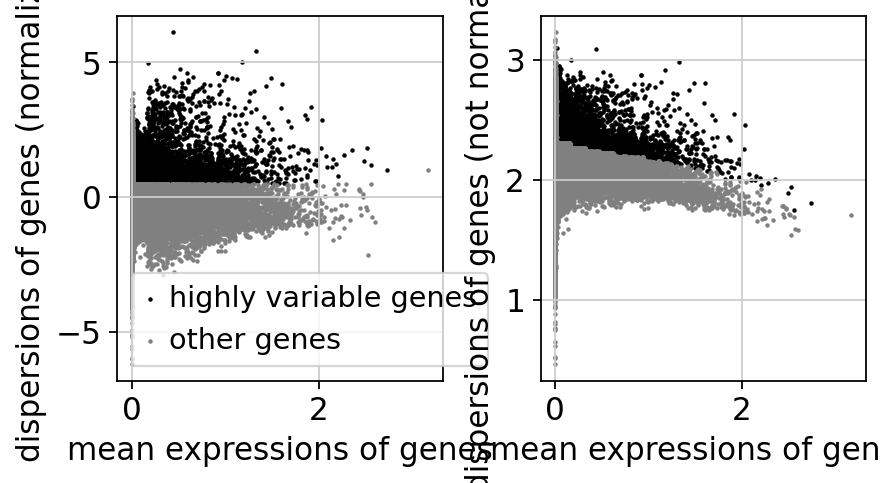

In [66]:
# 计算
sc.pp.highly_variable_genes(cdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# 绘制特异性基因散点图
sc.pl.highly_variable_genes(cdata)

/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


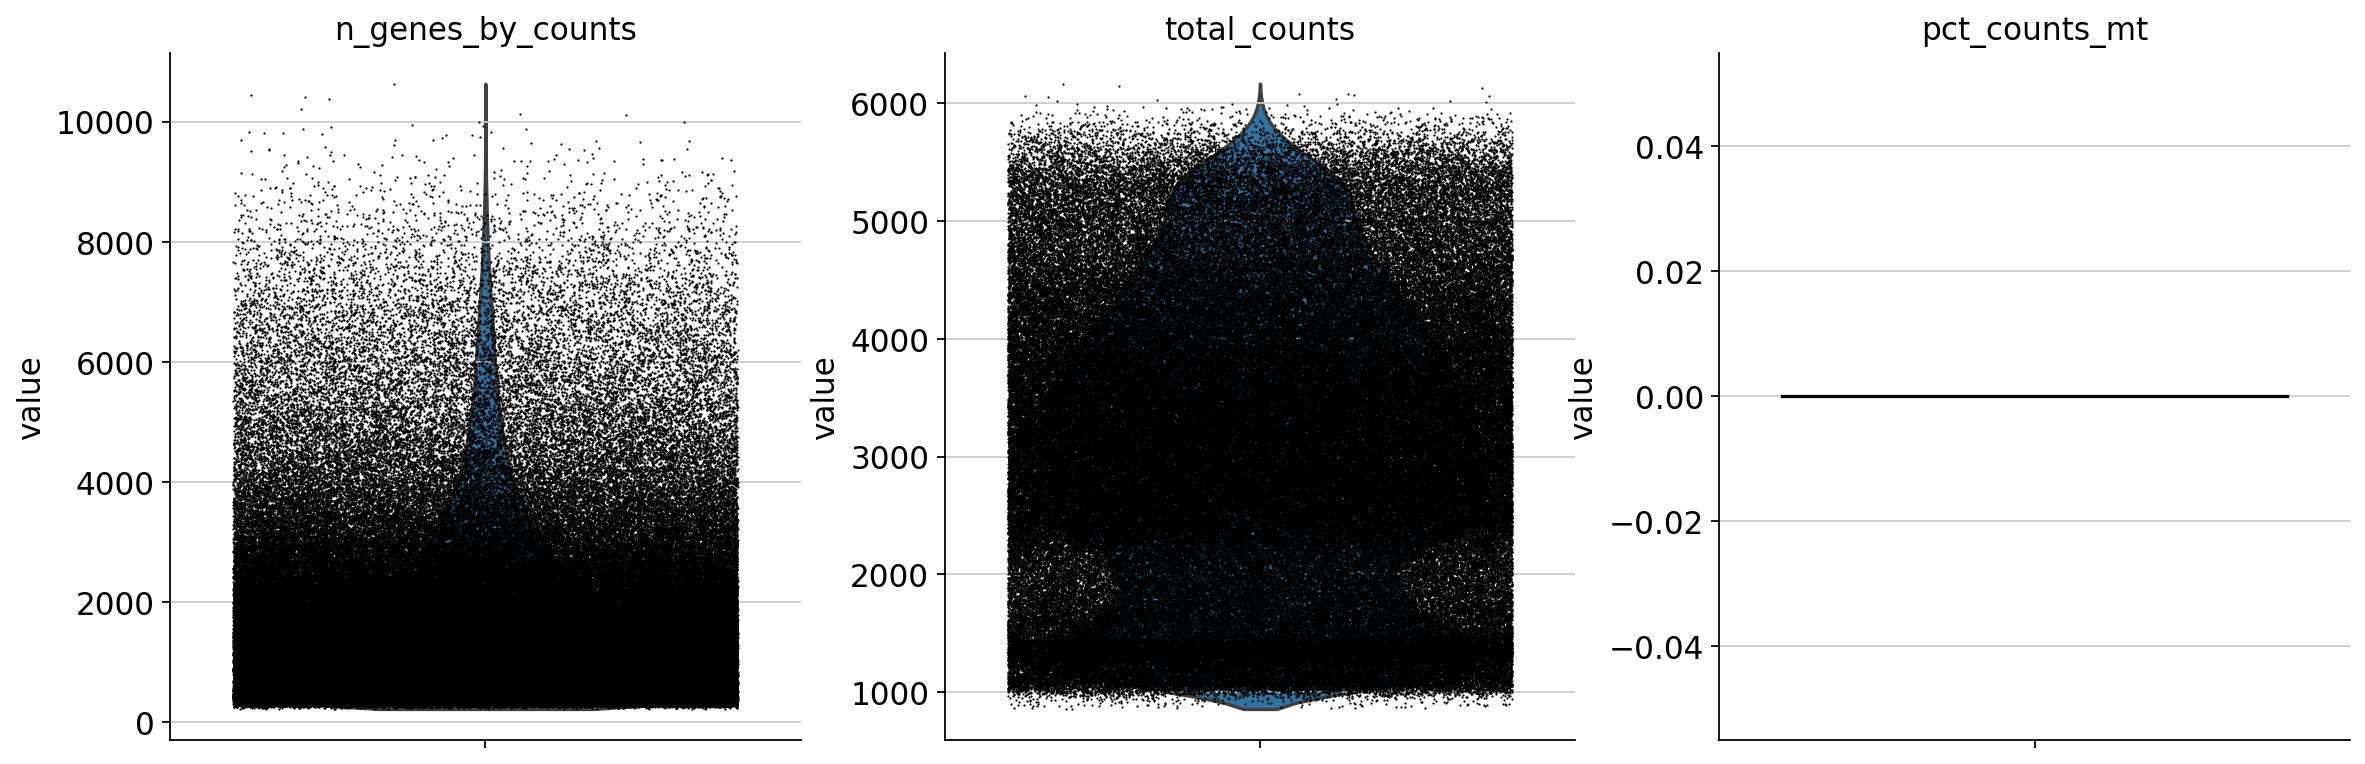

In [67]:
cdata.var['mt'] = cdata.var_names.str.startswith('MT-')  # 将线粒体基因标记为 mt
sc.pp.calculate_qc_metrics(cdata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(cdata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [68]:
# 获取只有特异性基因的数据集
cdata = cdata[:, cdata.var.highly_variable]
# 回归每个细胞的总计数和表达的线粒体基因的百分比的影响。
sc.pp.regress_out(cdata, ['total_counts', 'pct_counts_mt'])
# 将每个基因缩放到单位方差。阈值超过标准偏差 10。
sc.pp.scale(cdata, max_value=10)

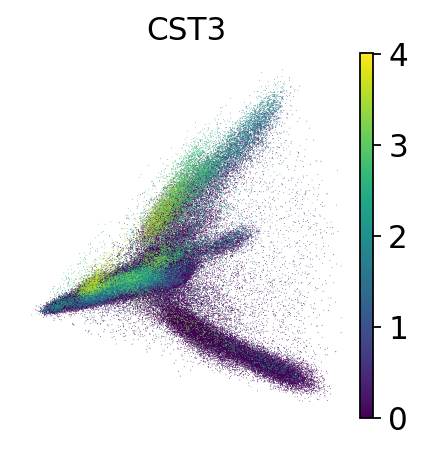

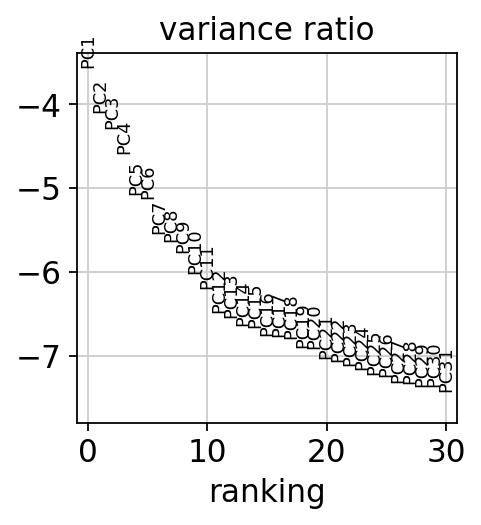

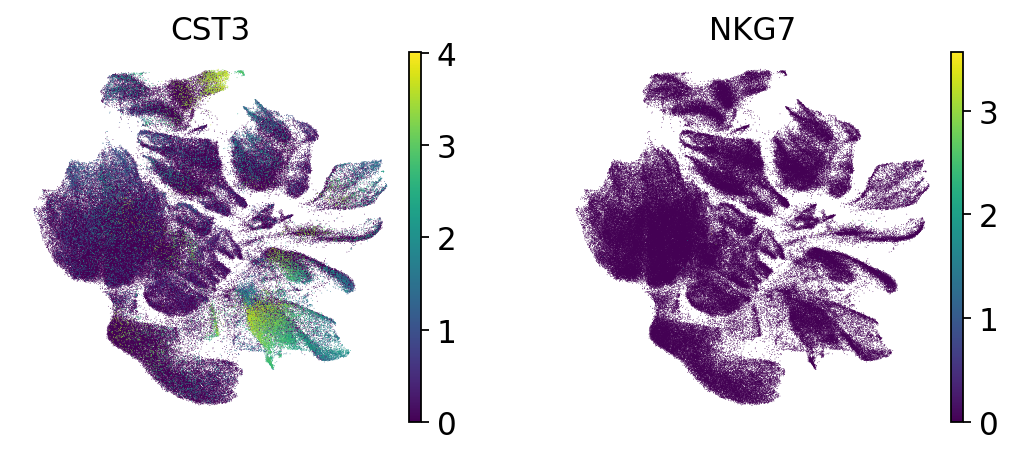

In [69]:
# 绘制 PCA 图
sc.tl.pca(cdata, svd_solver='arpack')
sc.pl.pca(cdata, color='CST3')
sc.pl.pca_variance_ratio(cdata, log=True)
sc.pp.neighbors(cdata, n_neighbors=10, n_pcs=40)
sc.tl.umap(cdata)
# 如果设置了 adata 的 .raw 属性时，下图显示了“raw”（标准化、对数化但未校正）基因表达矩阵。
sc.pl.umap(cdata, color=['CST3', 'NKG7'])
# 计算
sc.tl.leiden(cdata)
# 绘制


/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


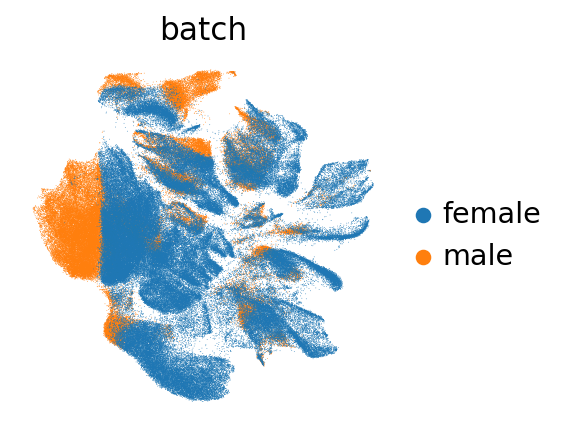

In [70]:
sc.pl.umap(cdata, color=['batch'])

In [71]:
sce.pp.harmony_integrate(cdata, 'batch')
sc.pp.neighbors(cdata)
sc.tl.umap(cdata)

2024-04-25 12:49:01,802 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-25 12:53:08,122 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-25 12:53:10,195 - harmonypy - INFO - Iteration 1 of 10
2024-04-25 12:54:44,716 - harmonypy - INFO - Iteration 2 of 10
2024-04-25 12:56:13,131 - harmonypy - INFO - Iteration 3 of 10
2024-04-25 12:57:39,705 - harmonypy - INFO - Iteration 4 of 10
2024-04-25 12:59:06,475 - harmonypy - INFO - Converged after 4 iterations


/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


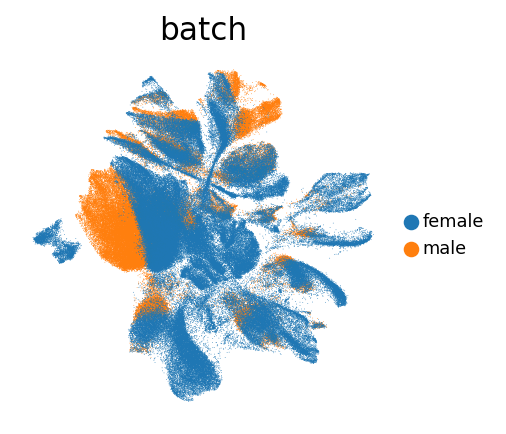

In [73]:
sc.pl.umap(cdata, color=['batch'], legend_fontsize=8)

/root/miniconda3/envs/Rdoc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


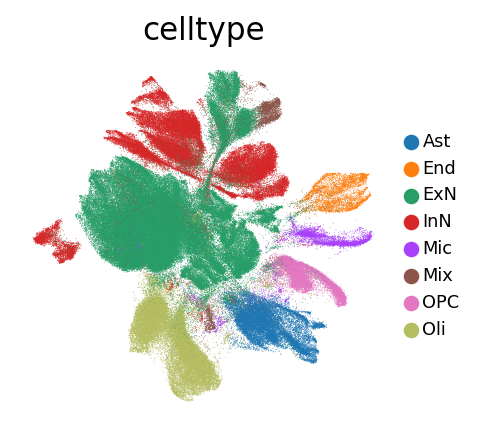

In [72]:
sc.pl.umap(cdata, color=['celltype'], legend_fontsize=8)

In [82]:
cdata_raw.obs = cdata.obs
cdata_raw.obs['leiden'] = cdata.obs['leiden']
cdata_raw.obs['seurat_clusters'] = cdata.obs['leiden']
cdata_raw.obs['nCount_RNA'] = cdata.obs['total_counts']
cdata_raw.obs['nFeature_RNA'] = cdata.obs['n_genes']
cdata_raw.obs['percent.mt'] = cdata.obs['pct_counts_mt']
cdata_raw.obs['sample'] = cdata.obs['sample']
cdata_raw.obs['celltype'] = cdata.obs['celltype']
cdata_raw.obs['orig.ident'] = cdata.obs['batch']

In [83]:
cdata_raw.obsm['X_umap'] = cdata.obsm['X_umap']

In [84]:
cdata_raw.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,celltype,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,seurat_clusters,percent.mt,batch
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,male,3880.429729,2672,Control_B3,ExN,2672,2397,3880.429729,0.0,0.0,12,12,0.0,male
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,male,2787.265300,1412,Control_B3,InN,1412,1297,2787.265300,0.0,0.0,5,5,0.0,male
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,male,2367.340490,1069,Control_B3,ExN,1069,987,2367.340490,0.0,0.0,4,4,0.0,male
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,male,3249.702420,1894,Control_B3,ExN,1894,1712,3249.702420,0.0,0.0,19,19,0.0,male
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,male,2470.005337,1140,Control_B3,InN,1140,1056,2470.005337,0.0,0.0,2,2,0.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9.TTTGGTTTCCAATGGT-1.Oli.Oli1,female,1914.737765,767,M9,Oli,767,706,1914.737765,0.0,0.0,3,3,0.0,female
M9.TTTGTCAAGTGGTAAT-1.OPC.OPC2,female,1633.515603,605,M9,OPC,605,556,1633.515603,0.0,0.0,10,10,0.0,female
M9.TTTGTCACAAGACGTG-1.InN.InN7_Mix,female,3098.741739,1691,M9,InN,1691,1558,3098.741739,0.0,0.0,17,17,0.0,female
M9.TTTGTCACATGCCTTC-1.InN.InN5_SST,female,3299.287989,1882,M9,InN,1882,1748,3299.287989,0.0,0.0,14,14,0.0,female


In [85]:
cdata_raw.write(results_file)